<h1 style="display:none;">
<h1 style="display:none;">
<h1 style="display:none;">
<h1 style="display:none;">
<h1 style="display:none;">
<h1 style="display:none;">
<h1 style="display:none;">
<h1 style="display:none;">
<h1 style="display:none;">
<h1 style="display:none;">
<h1 style="display:none;">
<h1 style="display:none;">
<h1 style="display:none;">
<h1 style="display:none;">
<h1 style="display:none;">
<h1 style="display:none;">
<h1 style="display:none;">


# Introduction to Computing for Engineers and Computer Scientists<BR><BR>Finishing OO and on to Machine Learning

## Questions, Discussion

### Piazza

### From Class

## HW5 Discussion

### General Comments

- (A): OO programming is complex and is very baffling in the beginning, but does enable code reuse and overall program simplification.


- (B): Python's operator overloading and ability to support "mathematic" and other functions for abstract types is one of the language's most powerful features. The concept is simple in scope but complex to understand, however.


- (A) + (B) $\Rightarrow$ HW5: The complexity and subtlety means that HW5 is intellectually very hard but the overall scope is very small.


- We have touched a small subset of Python's OO capabilities and general support for extensibility, both of which are language strengths.


- This assignment is hard. I understand and we will grade accordingly.


- But, many of you are banging your heads against the wall in frustration.


### Part 1: Abstract Algebra

- Color is a simple example. We will represent color with symbols and a Cayley table.


- $G = {r, g, b, y, m, c},$ where the symbols represent red, green, blue, yellow, magenta, cyan.


- The (silly) Cayley tables is (clearly I was bad at art in kindergarten):

| <img src="../images/color_algebra.jpeg">

- Representing this as a list of lists would be awkward.
    - color_cayley['r']['g'] does not make much sense for lists. 
    - List iteration is of the form color_cayley[1][7]. There are ways I could do this but it would be awkward.
    
    
- color_cayley['r']['g'] looks like a dictionary of dictionaries. I could have done the table this way, but choose a slightly different approach. In my dictionary,
    - A pair of symbols is the key, e.g. ('r', 'g')
    - The value is the symbol that represents "multiplying" the colors using the group operator.

In [7]:
# This simply keeps me from having to do 'c' over and over.
r,g,b,y,m,c = 'r','g','b','y','m','c'
cayley_colors = {}
cayley_colors.update({(r,r):r, (r,g):y, (r,b):m, (r,y):g, (r,c):b, (r,m):c})
cayley_colors.update({(g,r):y, (g,g):g, (g,b):c, (g,y):r, (g,c):b, (g,m):m})
cayley_colors.update({(b,r):m, (b,g):c, (b,b):b, (b,y):g, (b,c):r, (b,m):y})
cayley_colors.update({(y,r):m, (y,g):r, (y,b):c, (y,y):y, (y,c):g, (y,m):b})
cayley_colors.update({(c,r):g, (c,g):y, (c,b):m, (c,y):b, (c,c):c, (c,m):r})
cayley_colors.update({(m,r):c, (m,g):y, (m,b):r, (m,y):g, (m,b):c, (m,m):m})
print("If if got this right, with so little coffee, it is a miracle.")
cayley_colors

If if got this right, with so little coffee, it is a miracle.


{('b', 'b'): 'b',
 ('b', 'c'): 'r',
 ('b', 'g'): 'c',
 ('b', 'm'): 'y',
 ('b', 'r'): 'm',
 ('b', 'y'): 'g',
 ('c', 'b'): 'm',
 ('c', 'c'): 'c',
 ('c', 'g'): 'y',
 ('c', 'm'): 'r',
 ('c', 'r'): 'g',
 ('c', 'y'): 'b',
 ('g', 'b'): 'c',
 ('g', 'c'): 'b',
 ('g', 'g'): 'g',
 ('g', 'm'): 'm',
 ('g', 'r'): 'y',
 ('g', 'y'): 'r',
 ('m', 'b'): 'c',
 ('m', 'g'): 'y',
 ('m', 'm'): 'm',
 ('m', 'r'): 'c',
 ('m', 'y'): 'g',
 ('r', 'b'): 'm',
 ('r', 'c'): 'b',
 ('r', 'g'): 'y',
 ('r', 'm'): 'c',
 ('r', 'r'): 'r',
 ('r', 'y'): 'g',
 ('y', 'b'): 'c',
 ('y', 'c'): 'g',
 ('y', 'g'): 'r',
 ('y', 'm'): 'b',
 ('y', 'r'): 'm',
 ('y', 'y'): 'y'}

- I can define a new subclass of BaseCayleyGroup


In [46]:
class BaseCayleyGroup(object):
    pass



class CayleyColorsGroup(BaseCayleyGroup):
    
    __symbols = {'r', 'g', 'b', 'y', 'c', 'm'}  # Attribute of class -- group symbols
    __table = None # Attribute of class -- Cayley Table for class.

    def __init__(self, v):

        # Not strictly the correct approach. Should probably return an error, but OK.
        self.__value = v

        # This is a property of the class. I could have done this outside of the class
        # but I that freaks me out for no good reason.
        if CayleyColorsGroup.__table is None:
            
            r,g,b,y,m,c = 'r','g','b','y','m','c'
            cayley_colors = {}
            cayley_colors.update({(r,r):r, (r,g):y, (r,b):m, (r,y):g, (r,c):b, (r,m):c})
            cayley_colors.update({(g,r):y, (g,g):g, (g,b):c, (g,y):r, (g,c):b, (g,m):m})
            cayley_colors.update({(b,r):m, (b,g):c, (b,b):b, (b,y):g, (b,c):r, (b,m):y})
            cayley_colors.update({(y,r):m, (y,g):r, (y,b):c, (y,y):y, (y,c):g, (y,m):b})
            cayley_colors.update({(c,r):g, (c,g):y, (c,b):m, (c,y):b, (c,c):c, (c,m):r})
            cayley_colors.update({(m,r):c, (m,g):y, (m,b):r, (m,y):g, (m,b):c, (m,m):m})
            CayleyColorsGroup.__table = cayley_colors
            

    @classmethod # Method on class. HINT: Base class calls.
    def get_cayley_table(cls):
        return CayleyColorsGroup.__table

    # Method on instance. HINT: base class calls.
    def get_value(self):
        return self.__value


In [48]:
c1 = CayleyColorsGroup('r')
c2 = CayleyColorsGroup('r')
c3 = CayleyColorsGroup('g')

In [49]:
print('(c1 == c2) =', c1 == c2)
print('(c1 == c3) =', c1 == c3)

(c1 == c2) = True
(c1 == c3) = False


- What did that test tell me? The ```==``` operator works $\Rightarrow$
    - Some class implements ```__eq__()```
    - ```CayleyColorsGroup``` does not implement ```__eq__()```
    - So, the method MUST be in ```BaseCayleyGroup.```
    - And I have you two hints:
        1. Group elements are equals if the symbol is the same.
        2. ```BaseCayleyGroup``` calls ```CayleyColorsGroup.get_value()```

In [50]:
c4 = c1*c2
print(c4)

CayleyColorsGroup('r')


- What did that test tell me? The ```*``` operator works $\Rightarrow$
    - Some class implements ```__mul__()```
    - ```CayleyColorsGroup``` does not implement ```__mul__()```
    - So, the method MUST be in ```BaseCayleyGroup.```
    - And I gave you three hints:
        1. You need the Cayley Table to lookup the answer.
        1. I implemented the CayleyTable as a dictionary.
        2. ```BaseCayleyGroup``` calls ```CayleyColorsGroup.get_cayley_table()```

In [53]:
c5 = c4.get_cayley_table()[('r','g')]
c5

'y'

- You know getting the table returns a dictionary. You could have tried the method. What the heck, right?


- The answer was not quote right, because we want a member of the group. So, ```__mul__()``` must be something like

In [56]:
c6 = CayleyColorsGroup('r')
c7 = CayleyColorsGroup('g')
print("If I have ", c6, 'and', c7, 'then', c6, '*', c7, '=')
c8 = CayleyColorsGroup(c6.get_cayley_table()[c6.get_value(), c7.get_value()])
print(c8)

If I have  CayleyColorsGroup('r') and CayleyColorsGroup('g') then CayleyColorsGroup('r') * CayleyColorsGroup('g') =
CayleyColorsGroup('y')


- So what have we concluded?
    1. ```BaseCayleyGroup``` must implement ```__eq__()``` and ```__mul__()```
    1. It must be calling ```get_value()``` and ```get_cayley_table()``` on itself, and getting the child implementation.
    1. Don did something weird with the ```__str__()``` in ```BaseCayleyTable``` to do the printing, but he did not ask us to do that.

- If you can do this homework, you will have mastered the two core concepts in OO:
    - Simplifying application development by putting come functions in base classes, and inheriting in subclasses.
    - Extending and completing base classes and frameworks by implementing/overriding base methods.

- There is one more trick. ```x = BaseCayleyGroup(anything)``` must raise an exception.


- All told, you write about 8 statements in the base class, and know you have to implement
    - ```__init__()```
    - ```__eq__()```
    - ```__str__()__``` (Optional).
    - ```__mul__()```
    
- You have implemented simple classes and demonstrated Abstraction, Encapsulation and Inheritance.

### Part 2: Matrices

- I showed you what a matrix looks like.

```
tt = MySparseMatrix(int, 2, 2)
tt.set(0,0,11)
tt.set(0,1,5)
tt.set(1,0,2)
print(tt.get(0,1))
print("tt = ", tt)
```
- Produces
```
5
tt =  2 X 2 matrix of type <class 'int'>:
11,5
2,0
```

- Well, an empty 2x2 matrix is something like

In [58]:
m = [[0,0],[0,0]]
print(m)

[[0, 0], [0, 0]]


- So, I must have some kind of ```__str__()``` method to print slightly differently.


- ```set(0, 0, 11)``` must map to something like ```m[0][0]``` but that only works if I have already set up the lists with default values. Otherwise, I get undefined.


- And I know that I must do something to create values even if not set because the entry 1,1 is set to 0.

- But, the matrix is of any type. I pass in the type. How do I make default values of a type in a general way?


- Hint:

In [59]:
x = complex
print(x())

0j


- That is enough hints for ```MyMatrix.``` Equality and addition are obvious once you have figured out the matrix basic initialization, get and set.


- What about sparse matrices? You can only "store" values that are set.


- Think about what that means. The caller will give you ```(i,j)``` and you have to return:
    - The value if it exists.
    - The default for the type, otherwise.
    - Well, the Cayley table implementation shows you how to male ```(i,j)``` to a value.
    - And you had to solve the default class instance for MyMatrix.
    
    
- Matrix addition and equality require get() and set(), and you know how to override a method.

### Print Statements versus Logging

- You have seen that the print statements can be helpful, but can also be overwhelming.


- At different stages of development, I need to turn some on and some off. Just embedding print statements and commenting out is tedious.


- I would also like to:
    - Selectively print some statements for comfort, debugging, etc.
    - Print messages when something critical happens.
    - Write a lot of information to a (CSV) file for later analysis.
    
    
- Instead of _printing_ explicitly, I will have the code emit _log events_ when something happens. Configurable event listeners will determine
    - What messages go to the console for debugging, monitoring, etc.
    - What data goes to a file for subsequent analysis.
    
    
- Most environments, including Python, have the concept of a [__logger__](https://docs.python.org/3/library/logging.html).



- Instead of adding, removing, commenting out, etc. "print()" statements, I should 
    - _instrument_ my code with log statements
    - And then use
        - Handlers
        - Filters
    - To determine which information goes where.
    



import logging

file_level = logging.DEBUG
console_level = logging.ERROR

In [6]:
# create logger with logger to show to the class.
# An application can have several loggers.
logger = logging.getLogger('e1006_application')

# The logger's level is DEBUG.
logger.setLevel(logging.DEBUG)

# create file handler which logs even debug messages
fh = logging.FileHandler('demo.log')
fh.setLevel(logging.DEBUG)

# create console handler with a higher log level
ch = logging.StreamHandler()
ch.setLevel(logging.ERROR)

# create formatter and add it to the handlers
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fh.setFormatter(formatter)
ch.setFormatter(formatter)

# add the handlers to the logger
logger.addHandler(fh)
logger.addHandler(ch)

In [9]:
logger.debug("***** Starting a test run *******")
logger.info('Creating an info message.')
logger.debug("Creating a debug message")
logger.warning("Creating a warning message.")
logger.error("Creating an ERROR message.")
logger.error("Creating another ERROR message.!")

2018-04-11 16:01:48,561 - e1006_application - ERROR - Creating an ERROR message.
2018-04-11 16:01:48,562 - e1006_application - ERROR - Creating another ERROR message.!


- What does the log file look like?

In [11]:
with open("demo.log", "r") as log_file:
    for line in log_file:
        print(line)

2018-04-11 16:00:44,532 - e1006_application - DEBUG - ***** Starting a test run *******

2018-04-11 16:00:44,532 - e1006_application - INFO - Creating an info message.

2018-04-11 16:00:44,532 - e1006_application - DEBUG - Creating a debug message

2018-04-11 16:00:44,533 - e1006_application - WARNING - Creating a warning message.

2018-04-11 16:00:44,533 - e1006_application - ERROR - Creating an ERROR message.

2018-04-11 16:01:03,534 - e1006_application - DEBUG - ***** Starting a test run *******

2018-04-11 16:01:03,534 - e1006_application - INFO - Creating an info message.

2018-04-11 16:01:03,535 - e1006_application - DEBUG - Creating a debug message

2018-04-11 16:01:03,535 - e1006_application - WARNING - Creating a warning message.

2018-04-11 16:01:03,535 - e1006_application - ERROR - Creating an ERROR message.

2018-04-11 16:01:48,560 - e1006_application - DEBUG - ***** Starting a test run *******

2018-04-11 16:01:48,560 - e1006_application - INFO - Creating an info message.


In [12]:
# I can change the level of the logger.
ch.setLevel(logging.WARNING)

In [13]:
logger.debug("***** Starting a test run *******")
logger.info('Creating an info message.')
logger.debug("Creating a debug message")
logger.warning("Creating a warning message.")
logger.error("Creating an ERROR message.")
logger.error("Creating another ERROR message.!")

2018-04-11 16:05:14,867 - e1006_application - WARNING - Creating a warning message.
2018-04-11 16:05:14,868 - e1006_application - ERROR - Creating an ERROR message.
2018-04-11 16:05:14,869 - e1006_application - ERROR - Creating another ERROR message.!


- An application can also define it's own logging level. The default levels are:

| Level	| Numeric value |
| :------: | :------: |
|CRITICAL |50|
|ERROR |	40 |
|WARNING	| 30 |
|INFO |	20 |
| DEBUG| 10 |
| NOTSET |	0 |

- And the file again, ...

In [14]:
with open("demo.log", "r") as log_file:
    for line in log_file:
        print(line)

2018-04-11 16:00:44,532 - e1006_application - DEBUG - ***** Starting a test run *******

2018-04-11 16:00:44,532 - e1006_application - INFO - Creating an info message.

2018-04-11 16:00:44,532 - e1006_application - DEBUG - Creating a debug message

2018-04-11 16:00:44,533 - e1006_application - WARNING - Creating a warning message.

2018-04-11 16:00:44,533 - e1006_application - ERROR - Creating an ERROR message.

2018-04-11 16:01:03,534 - e1006_application - DEBUG - ***** Starting a test run *******

2018-04-11 16:01:03,534 - e1006_application - INFO - Creating an info message.

2018-04-11 16:01:03,535 - e1006_application - DEBUG - Creating a debug message

2018-04-11 16:01:03,535 - e1006_application - WARNING - Creating a warning message.

2018-04-11 16:01:03,535 - e1006_application - ERROR - Creating an ERROR message.

2018-04-11 16:01:48,560 - e1006_application - DEBUG - ***** Starting a test run *******

2018-04-11 16:01:48,560 - e1006_application - INFO - Creating an info message.


| <img src="../images/logging_model.jpeg"> |
| :---: |
| __Logging Conceptual Model__ |

- In practice: In the product I have been building:
    - We write very detailed log messages for auditing, problem determination, etc.
    - We selectively send critical messages to a Slack channel to immediately notify someone of the team that there is a problem.

| <img src="../images/critical_slack.jpeg"> |
| :---: |
| __Slack Critical Message Channel__ |

| <img src="../images/log_stream.jpeg"> |
| :---: |
| __Full Log Stream__ |

__Summary:__
- There is no action or to do for you. This is FYI.
- I put print statements in my example code to help with teaching and explanation.
- I want to make sure that you understand this is not a "real" approach to the function.

## The Strange Island

- We have four lectures left, including this one. I need to move on from OO.


- We implemented
    - Initialization
    - Animation
    - A class model for organisms, animals, plants, predators and prey.
    - The ability to move around and die of old age.
    - We need to implement starvation, reproduction and eating. This occurs when two things are at the same (i,j) location. All we need to do is implement a function that:
        - Looks at every (i,j) location.
        - If there is more than one thing
            - (moose, moose) $\rightarrow$ new moose if long enough since last birth.
            - (wolf, wolf) $\rightarrow$ new wolf if long enough since last birth
            - (wolf, moose) or (moose, wolf) $\rightarrow$ fed wolf and dead moose.
            - (plant, moose) or (moose, plant) $\rightarrow$ fed moose and dead plant.
    - We also need to support plants spreading.
    
    
- These are relatively straightforward extensions to what we have done, but I want to move on to some cool things. So,
    - I will complete and publish the code.
    - Schedule an optional recitation where I walk through and we discuss the details for the few of you who are interested.
    - Extra-credit 3 will be examining my code and suggesting, in writing 3 changes that would improve the solution that I hacked together.

## Moneyball!



### Lecture 1 $-$ Reminder: Why Python?

["The Case For Python in Scientific Computing"](https://www.datacamp.com/community/blog/python-scientific-computing-case) 

1. Interoperability with other languages: Complex science and engineering problems interact with preexisting systems and devices that use a diverse set of languages, interfaces, data models, etc.
<br><br>
1. __Reusable tools and libraries:_ All languages come with built in tools (reusable sets of programs). Python by far has the best set of resuable tools and libraries. "If you have a problem to solve, you can most likely find a library to help and it's probably on github!__"
<br><br>
1. Open source: Enables independent extensions and evolution, although this is true of many languages.
<br><br>   

| <img src="../images/why_python_2.jpeg"> |
| :---: |
| __Python and Scientific/Engineering__ |

- For engineers and applied scientists, learning the Python language is a means to an end.


- The end is the rich and expanding portfolio of tools, frameworks, utilities.

### Introduction and Overview

- "[Moneyball: The Art of Winning an Unfair Game](https://en.wikipedia.org/wiki/Moneyball) is a book by Michael Lewis, published in 2003, about the Oakland Athletics baseball team and its general manager Billy Beane. Its focus is the team's analytical, evidence-based, sabermetric approach to assembling a competitive baseball team, despite Oakland's disadvantaged revenue situation."


- "The central premise of Moneyball is that the collective wisdom of baseball insiders (including players, managers, coaches, scouts, and the front office) over the past century is subjective and often flawed. Statistics such as stolen bases, runs batted in, and batting average, typically used to gauge players, are relics of a 19th-century view of the game and the statistics available at that time. Before sabermetrics was introduced to baseball, teams were dependent on the skills of their scouts to find and evaluate players. Scouts are those who are experienced in the sport, usually having been involved as players or coaches. The book argues that the Oakland A's' front office took advantage of more analytical gauges of player performance to field a team that could better compete against richer competitors in Major League Baseball (MLB)"


- We will do very simple versions of the concept to get a feel for data analytics, numerical libraries and machine learning using Python.

### Let's Do Some Simple Data Browsing/Visualization

- We are engineers and scientists. We are not going to build a team using experience, conventional wisdom, the way we have always done it, etc.


- This is a scientific and engineering problem. We need data and a model.

#### Data

- What data do we have about teams?

| <img src="../images/team_info.jpeg"> |
| :---: |
| __Team Performance Data__ |

- What do we know about players?
    - Batting is offensive statistics, e.g. hits, home runs, etc.
    - Fielding is how they handle hit balls, e.g. attempts, errors.
    - Pitching is the opposite of batting, e.g. how often does the pitcher give up a hit?
    - What positions can/do players play?
    - Salaries.


- Positions

| <img src="../images/Baseball_positions.jpg" width="66%"> |
| :---: |
| __Player Positions__ |

- Offensive (Batting)

| <img src="../images/player_batting.jpeg"> |
| :---: |
| __Player Batting Info__ |

- Pitching

| <img src="../images/player_pitching.jpeg"> |
| :---: |
| __Player Pitching Info__ |

- Fielding

| <img src="../images/player_fielding.jpeg"> |
| :---: |
| __Player Fielding Info__ |

- Salaries

| <img src="../images/playersalary.jpeg"> |
| :---: |
| __Player Salary Info__ |

#### Read Data


In [2]:
import pandas as pd

df = pd.read_csv("../Data/teaminfo.csv")

In [61]:
df.tail(20)

,year,teamid,rank,games,wins,loses,WSWin,runs,at_basts,hits,...,walks,strikeouts,stolen_bases,caught_stealing,sacrifice_flies,runs_against,earned_runs,earned_run_average,errors,fielding_percentage
898,2016,HOU,3,162,84,78,N,724,5545,1367,...,554,1452,102,44,31.0,701,663,4.06,77,0.987
899,2016,KCA,3,162,81,81,N,675,5552,1450,...,382,1224,121,35,34.0,712,674,4.21,94,0.984
900,2016,LAA,4,162,74,88,N,717,5431,1410,...,471,991,73,34,49.0,727,676,4.28,97,0.983
901,2016,LAN,1,162,91,71,N,725,5518,1376,...,525,1321,45,26,32.0,638,598,3.70,80,0.986
902,2016,MIA,3,161,79,82,N,655,5547,1460,...,447,1213,71,28,38.0,682,646,4.05,86,0.985
903,2016,MIL,4,162,73,89,N,671,5330,1299,...,599,1543,181,56,39.0,733,650,4.08,136,0.978
904,2016,MIN,5,162,59,103,N,722,5618,1409,...,513,1426,91,32,43.0,889,814,5.08,126,0.979
905,2016,NYA,4,162,84,78,N,680,5458,1378,...,475,1188,72,22,49.0,702,660,4.16,86,0.985
906,2016,NYN,2,162,87,75,N,671,5459,1342,...,517,1302,42,18,41.0,617,574,3.57,90,0.985
907,2016,OAK,5,162,69,93,N,653,5500,1352,...,442,1145,50,23,34.0,761,718,4.51,97,0.984


- What did we just do?
    - Read a CSV into a Pandas DataFrame
    - Examined the last 20 rows (actually produced a new DataFrame containing) the last 20 rows of the original DataFrame.

#### Let's Visualize and Analyze

- Cool thing 1: Histogram Wins

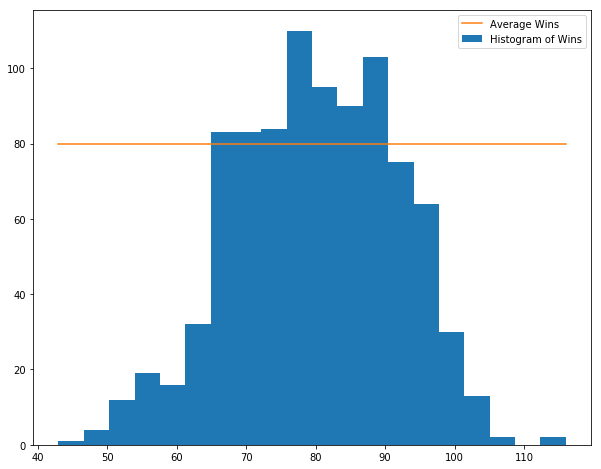

In [21]:
import matplotlib.pyplot as plt
plt.ioff()

# Make a figure/subplot
plt.figure(figsize=(10,8))

# Histogram wins into 20 buckets
n, bins, p = plt.hist(df['wins'], 20, label="Histogram of Wins")

# Compute the mean number of wins and plot as a line.
mu = df['wins'].mean()
min = df['wins'].min()
max = df['wins'].max()
l = plt.plot([min,max], [mu,mu], label="Average Wins")

plt.legend()

plt.show()


- Cool thing 2: Scatter Plot wins as a function of homeruns.

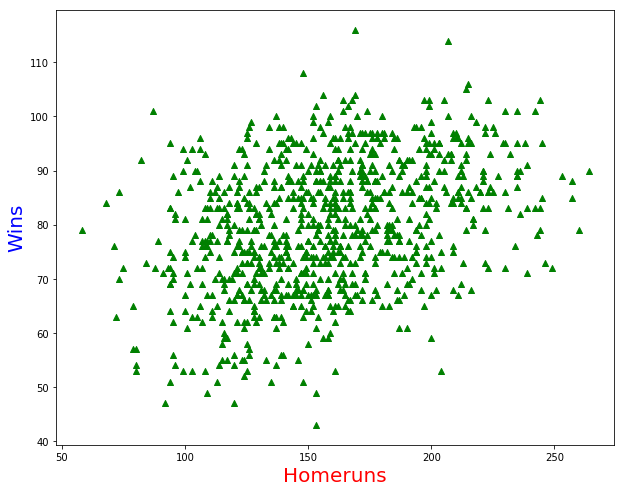

In [33]:
# Make a new DataFrame with just the columns we want.
w_v_hr = pd.DataFrame(df[['home_runs','wins']])

# Make a new figure and set the size.
plt.figure(figsize=(10,8))

# Produce a scatter plot. The point color is green and the marker is a triangle.
plt.scatter(w_v_hr['home_runs'], w_v_hr['wins'], color="g", marker="^")

# Set some labels, font sizes and colors.
plt.xlabel("Homeruns", fontsize=20, color="r")
plt.ylabel("Wins", fontsize=20, color="b")

# Show the figure.
plt.show()

- What is the correlation between HRs and wins?

In [34]:
w_v_hr.corr()

,home_runs,wins
home_runs,1.000000,0.366849
wins,0.366849,1.000000


[__HOW HOW TO INTERPRET A CORRELATION COEFFICIENT R__](http://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/)

In statistics, the correlation coefficient r measures the strength and direction of a linear relationship between two variables on a scatterplot. The value of r is always between +1 and –1. To interpret its value, see which of the following values your correlation r is closest to:

- Exactly $–1$: A perfect downhill (negative) linear relationship
- $–0.70$: A strong downhill (negative) linear relationship
- $–0.50$: A moderate downhill (negative) relationship 
- $-0.30$: A weak downhill (negative) linear relationship
- $0$: No linear relationship
- $+0.30$: A weak uphill (positive) linear relationship
- $+0.50$: A moderate uphill (positive) relationship
- $0.70$: A strong uphill (positive) linear relationship
- Exactly $+1$ A perfect uphill (positive) linear relationship


- Correlations gone wild.

In [35]:
df.corr()

,year,rank,games,wins,loses,runs,at_basts,hits,doubles,triples,...,walks,strikeouts,stolen_bases,caught_stealing,sacrifice_flies,runs_against,earned_runs,earned_run_average,errors,fielding_percentage
year,1.000000,-0.143385,0.173925,0.064945,0.065103,0.036425,0.184300,0.084122,0.373114,-0.151842,...,-0.140116,0.693800,-0.311655,-0.544616,-0.278731,0.034589,0.103848,0.031735,-0.508298,0.541028
rank,-0.143385,1.000000,0.048105,-0.773918,0.811173,-0.413253,0.011006,-0.200168,-0.205209,0.011821,...,-0.307768,0.004263,-0.038045,0.142643,-0.247109,0.444685,0.407737,0.414782,0.337042,-0.337473
games,0.173925,0.048105,1.000000,0.370266,0.363513,0.339765,0.967173,0.652376,0.401734,0.122280,...,0.306388,0.413115,0.107512,0.085399,0.070013,0.317847,0.315043,-0.118703,0.221394,0.088089
wins,0.064945,-0.773918,0.370266,1.000000,-0.730609,0.558594,0.391991,0.478310,0.326008,0.028302,...,0.462781,0.063844,0.129699,-0.022943,0.293405,-0.395921,-0.371180,-0.564773,-0.188008,0.325085
loses,0.065103,0.811173,0.363513,-0.730609,1.000000,-0.310345,0.317679,-0.000114,-0.031263,0.060619,...,-0.239241,0.241311,-0.052518,0.084934,-0.291676,0.630772,0.604148,0.479542,0.349095,-0.259240
runs,0.036425,-0.413253,0.339765,0.558594,-0.310345,1.000000,0.478526,0.802633,0.646704,0.057869,...,0.628431,0.051717,-0.001748,-0.098627,0.495870,0.400948,0.420943,0.274112,-0.039085,0.140185
at_basts,0.184300,0.011006,0.967173,0.391991,0.317679,0.478526,1.000000,0.790044,0.516430,0.132280,...,0.327488,0.379069,0.069276,0.024065,0.283317,0.395707,0.398010,-0.025720,0.189474,0.111354
hits,0.084122,-0.200168,0.652376,0.478310,-0.000114,0.802633,0.790044,1.000000,0.687157,0.173270,...,0.394974,0.067709,0.039055,-0.008744,0.486705,0.453561,0.467737,0.184794,0.067685,0.131473
doubles,0.373114,-0.205209,0.401734,0.326008,-0.031263,0.646704,0.516430,0.687157,1.000000,0.048628,...,0.307399,0.263448,-0.164075,-0.274183,0.359872,0.362446,0.393986,0.222935,-0.139458,0.256301
triples,-0.151842,0.011821,0.122280,0.028302,0.060619,0.057869,0.132280,0.173270,0.048628,1.000000,...,-0.064815,-0.065748,0.270462,0.253111,0.159237,0.049912,0.036896,-0.015720,0.144544,-0.101339


- Including year in a correlation between metrics does not make sense.

In [39]:
df2 = df.drop(['year'], axis=1)
df2.corr()

,rank,games,wins,loses,runs,at_basts,hits,doubles,triples,home_runs,walks,strikeouts,stolen_bases,caught_stealing,sacrifice_flies,runs_against,earned_runs,earned_run_average,errors,fielding_percentage
rank,1.000000,0.048105,-0.773918,0.811173,-0.413253,0.011006,-0.200168,-0.205209,0.011821,-0.320328,-0.307768,0.004263,-0.038045,0.142643,-0.247109,0.444685,0.407737,0.414782,0.337042,-0.337473
games,0.048105,1.000000,0.370266,0.363513,0.339765,0.967173,0.652376,0.401734,0.122280,0.204492,0.306388,0.413115,0.107512,0.085399,0.070013,0.317847,0.315043,-0.118703,0.221394,0.088089
wins,-0.773918,0.370266,1.000000,-0.730609,0.558594,0.391991,0.478310,0.326008,0.028302,0.366849,0.462781,0.063844,0.129699,-0.022943,0.293405,-0.395921,-0.371180,-0.564773,-0.188008,0.325085
loses,0.811173,0.363513,-0.730609,1.000000,-0.310345,0.317679,-0.000114,-0.031263,0.060619,-0.216931,-0.239241,0.241311,-0.052518,0.084934,-0.291676,0.630772,0.604148,0.479542,0.349095,-0.259240
runs,-0.413253,0.339765,0.558594,-0.310345,1.000000,0.478526,0.802633,0.646704,0.057869,0.722088,0.628431,0.051717,-0.001748,-0.098627,0.495870,0.400948,0.420943,0.274112,-0.039085,0.140185
at_basts,0.011006,0.967173,0.391991,0.317679,0.478526,1.000000,0.790044,0.516430,0.132280,0.294434,0.327488,0.379069,0.069276,0.024065,0.283317,0.395707,0.398010,-0.025720,0.189474,0.111354
hits,-0.200168,0.652376,0.478310,-0.000114,0.802633,0.790044,1.000000,0.687157,0.173270,0.437426,0.394974,0.067709,0.039055,-0.008744,0.486705,0.453561,0.467737,0.184794,0.067685,0.131473
doubles,-0.205209,0.401734,0.326008,-0.031263,0.646704,0.516430,0.687157,1.000000,0.048628,0.432573,0.307399,0.263448,-0.164075,-0.274183,0.359872,0.362446,0.393986,0.222935,-0.139458,0.256301
triples,0.011821,0.122280,0.028302,0.060619,0.057869,0.132280,0.173270,0.048628,1.000000,-0.216900,-0.064815,-0.065748,0.270462,0.253111,0.159237,0.049912,0.036896,-0.015720,0.144544,-0.101339
home_runs,-0.320328,0.204492,0.366849,-0.216931,0.722088,0.294434,0.437426,0.432573,-0.216900,1.000000,0.389083,0.341558,-0.250488,-0.320080,0.100513,0.336602,0.367850,0.281919,-0.163907,0.217315


#### How Much Data do We Have?


In [42]:
print("(rows, columns) for teams is = ", df.shape)

(rows, columns) for teams is =  (918, 23)


In [44]:
batting_df = pd.read_csv("../Data/playerbatting.csv")
pitching_df = pd.read_csv("../Data/playerpitching.csv")
fielding_df = pd.read_csv("../Data/playerfielding.csv")
salary_df = pd.read_csv("../Data/playersalary.csv")
print("(rows, columns) for batting is = ", batting_df.shape)
print("(rows, columns) for pitching is = ", pitching_df.shape)
print("(rows, columns) for fielding is = ", fielding_df.shape)
print("(rows, columns) for salary is = ", salary_df.shape)

(rows, columns) for batting is =  (37402, 13)
(rows, columns) for pitching is =  (18363, 9)
(rows, columns) for fielding is =  (37099, 7)
(rows, columns) for salary is =  (26428, 5)


In [47]:
all_dfs = [df, batting_df, pitching_df, fielding_df, salary_df]
total_cells = sum([x.shape[0]*x.shape[1] for x in all_dfs])
print("total number of cells is = ", total_cells)

total number of cells is =  1064440


#### Let's Take a Step Back

We have at least 3 tasks:
1. Figure out the relationships between team performance metrics (e.g HRs, ERA) and a team's wins. What metrics do we want to optimize?
2. Given a set of players, estimate the team's performance if the team has the players.
3. Find the cost optimal team(s)

This will involve:
1. Data Munging.
1. Cleaning and shaping.
2. Data Exploration/Visualization.
3. Learning.
4. Optimization.

But first, least learn a little about Pandas and PyPlot, which we need for all 5 tasks.

## Pandas

### Overview

- There is a very good tutorial and set of recipes for common scenarios as https://pandas.pydata.org/pandas-docs/stable/tutorials.html.


- This section will go through some of the material in the context of our data and business problem -- Moneyball.


- ((https://en.wikipedia.org/wiki/Pandas_(software)))
    - "pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. It is free software released under the three-clause BSD license.[2] The name is derived from the term "panel data", an econometrics term for data sets that include both time-series and cross-sectional data" 

    - Library features:
        - DataFrame object for data manipulation with integrated indexing.
        - Tools for reading and writing data between in-memory data structures and different file formats.
        - Data alignment and integrated handling of missing data.
        - Reshaping and pivoting of data sets.
        - Label-based slicing, fancy indexing, and subsetting of large data sets.
        - Data structure column insertion and deletion.
        - Group by engine allowing split-apply-combine operations on data sets.
        - Data set merging and joining.
        - Hierarchical axis indexing to work with high-dimensional data in a lower-dimensional data structure.
        - Time series-functionality: Date range generation[4] and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging.
        - The library is highly optimized for performance, ..."
        

### Core Data Structures

| Data Structure |	Dimensions	| Description |
| :------------: | :------------: | :-----------: |
| Series	| 1	| 1D labeled homogeneous array, sizeimmutable.|
| Data Frames	| 2	| General  2D labeled, size-mutable tabular structure with potentially heterogeneously typed columns.|
| Panel	| 3	| General 3D labeled, size-mutable array.|
| | | [__Pandas Data Structures__](https://www.tutorialspoint.com/python_pandas/python_pandas_introduction_to_data_structures.htm) |

- We will focus on DataFrames.

| <img src="../images/pandas1.jpg"> |
| :---: |
| [__DataFrame__](https://www.tutorialspoint.com/python_pandas/python_pandas_dataframe.htm) |


- Out data is tabular and naturally maps to DataFrames. For example, 

In [48]:
batting_df.tail(30)

,playerid,yearid,games,at_bats,runs,hits,doubles,triples,home_runs,rbi,stolen_bases,caught_steaming,walks
37372,zoskyed01,1991,18.0,27.0,2.0,4.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0
37373,zoskyed01,1992,8.0,7.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
37374,zoskyed01,1995,6.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37375,zoskyed01,1999,8.0,7.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
37376,zoskyed01,2000,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37377,zuberjo01,1996,30.0,91.0,7.0,23.0,4.0,0.0,1.0,10.0,1.0,0.0,6.0
37378,zuberjo01,1998,38.0,45.0,6.0,11.0,3.0,1.0,2.0,6.0,0.0,0.0,6.0
37379,zuletju01,2000,30.0,68.0,13.0,20.0,8.0,0.0,3.0,12.0,0.0,1.0,2.0
37380,zuletju01,2001,49.0,106.0,11.0,23.0,3.0,0.0,6.0,24.0,0.0,1.0,8.0
37381,zumayjo01,2006,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
df.tail(20)

,year,teamid,rank,games,wins,loses,WSWin,runs,at_basts,hits,...,walks,strikeouts,stolen_bases,caught_stealing,sacrifice_flies,runs_against,earned_runs,earned_run_average,errors,fielding_percentage
898,2016,HOU,3,162,84,78,N,724,5545,1367,...,554,1452,102,44,31.0,701,663,4.06,77,0.987
899,2016,KCA,3,162,81,81,N,675,5552,1450,...,382,1224,121,35,34.0,712,674,4.21,94,0.984
900,2016,LAA,4,162,74,88,N,717,5431,1410,...,471,991,73,34,49.0,727,676,4.28,97,0.983
901,2016,LAN,1,162,91,71,N,725,5518,1376,...,525,1321,45,26,32.0,638,598,3.70,80,0.986
902,2016,MIA,3,161,79,82,N,655,5547,1460,...,447,1213,71,28,38.0,682,646,4.05,86,0.985
903,2016,MIL,4,162,73,89,N,671,5330,1299,...,599,1543,181,56,39.0,733,650,4.08,136,0.978
904,2016,MIN,5,162,59,103,N,722,5618,1409,...,513,1426,91,32,43.0,889,814,5.08,126,0.979
905,2016,NYA,4,162,84,78,N,680,5458,1378,...,475,1188,72,22,49.0,702,660,4.16,86,0.985
906,2016,NYN,2,162,87,75,N,671,5459,1342,...,517,1302,42,18,41.0,617,574,3.57,90,0.985
907,2016,OAK,5,162,69,93,N,653,5500,1352,...,442,1145,50,23,34.0,761,718,4.51,97,0.984


### Basic Operations

#### Sort and Filter

##### Sort

In [52]:
teams_sorted_by_wins = df.sort_values(by=['wins'])
teams_sorted_by_wins.head(10)

,year,teamid,rank,games,wins,loses,WSWin,runs,at_basts,hits,...,walks,strikeouts,stolen_bases,caught_stealing,sacrifice_flies,runs_against,earned_runs,earned_run_average,errors,fielding_percentage
508,2003,DET,5,162,43,119,N,591,5466,1312,...,443,1099,98,63,49.0,928,847,5.30,138,0.978
239,1994,CAL,4,115,47,68,NaN,543,3943,1042,...,402,715,65,54,NaN,660,618,5.42,76,0.983
258,1994,SDN,4,117,47,70,NaN,479,4068,1117,...,319,762,79,37,NaN,531,474,4.08,111,0.975
259,1994,SEA,3,112,49,63,NaN,569,3883,1045,...,372,652,48,21,NaN,616,546,4.99,95,0.977
241,1994,CHN,5,113,49,64,NaN,500,3918,1015,...,364,750,69,53,NaN,549,508,4.47,81,0.982
808,2013,HOU,5,162,51,111,N,610,5457,1307,...,426,1535,110,61,38.0,848,766,4.79,125,0.979
246,1994,FLO,5,115,51,64,NaN,468,3926,1043,...,349,746,65,26,NaN,576,508,4.50,95,0.978
255,1994,OAK,2,114,51,63,NaN,549,3885,1009,...,417,686,91,39,NaN,589,537,4.82,88,0.979
529,2004,ARI,5,162,51,111,N,615,5544,1401,...,441,1022,53,32,37.0,899,794,4.98,139,0.977
262,1994,TEX,1,114,52,62,NaN,613,3983,1114,...,437,730,82,35,NaN,697,619,5.45,105,0.976


In [53]:
teams_sorted_by_wins = df.sort_values(by=['wins', 'teamid'], ascending=False)
teams_sorted_by_wins.head(10)

,year,teamid,rank,games,wins,loses,WSWin,runs,at_basts,hits,...,walks,strikeouts,stolen_bases,caught_stealing,sacrifice_flies,runs_against,earned_runs,earned_run_average,errors,fielding_percentage
462,2001,SEA,1,162,116,46,N,927,5680,1637,...,614,989,174,42,70.0,627,576,3.54,83,0.986
366,1998,NYA,1,162,114,48,Y,965,5643,1625,...,653,1025,153,63,NaN,656,618,3.82,98,0.984
42,1986,NYN,1,162,108,54,Y,783,5558,1462,...,631,968,118,48,NaN,578,513,3.11,138,0.978
350,1998,ATL,1,162,106,56,N,826,5484,1489,...,548,1062,98,43,NaN,581,519,3.25,91,0.985
554,2004,SLN,1,162,105,57,N,855,5555,1544,...,548,1085,111,47,70.0,659,605,3.75,97,0.985
95,1988,OAK,1,162,104,58,N,800,5602,1474,...,580,926,129,54,NaN,620,569,3.44,105,0.983
208,1993,ATL,1,162,104,58,N,767,5515,1444,...,560,946,125,48,NaN,559,508,3.14,108,0.983
232,1993,SFN,2,162,103,59,N,808,5557,1534,...,516,930,120,65,NaN,636,584,3.61,101,0.984
147,1990,OAK,1,162,103,59,N,733,5433,1379,...,651,992,141,54,NaN,570,514,3.18,87,0.986
488,2002,OAK,1,162,103,59,N,800,5558,1450,...,609,1008,46,20,36.0,654,593,3.68,102,0.984


##### Filter

- ```teams_sorted_by_wins``` is already sorted. I want ONLY National League Teams for years greater than or equal to 2000, and the team is either BOS or NYY.

In [76]:
f1 =(df['year'] >= 2000) 
f2 = (df['teamid'].isin(['BOS','NYA']))
interesting_teams = teams_sorted_by_wins[f1 & f2]
interesting_teams.head(20)

/Users/donaldferguson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,year,teamid,rank,games,wins,loses,WSWin,runs,at_basts,hits,...,walks,strikeouts,stolen_bases,caught_stealing,sacrifice_flies,runs_against,earned_runs,earned_run_average,errors,fielding_percentage
486,2002,NYA,1,161,103,58,N,897,5601,1540,...,640,1171,100,38,41.0,697,625,3.87,127,0.979
695,2009,NYA,1,162,103,59,Y,915,5660,1604,...,663,1014,111,28,39.0,753,687,4.26,86,0.985
516,2003,NYA,1,163,101,61,N,877,5605,1518,...,684,1042,98,33,35.0,716,653,4.02,114,0.981
546,2004,NYA,1,162,101,61,N,897,5527,1483,...,670,982,84,33,50.0,808,752,4.69,99,0.984
532,2004,BOS,2,162,98,64,Y,949,5720,1613,...,659,1189,68,30,55.0,768,674,4.18,118,0.981
605,2006,NYA,1,162,97,65,N,930,5651,1608,...,649,1053,139,35,49.0,767,708,4.41,104,0.983
755,2011,NYA,1,162,97,65,N,867,5518,1452,...,627,1138,147,46,51.0,657,605,3.73,102,0.983
801,2013,BOS,1,162,97,65,Y,853,5651,1566,...,581,1308,123,19,50.0,656,613,3.79,80,0.987
621,2007,BOS,1,162,96,66,Y,867,5589,1561,...,689,1042,96,24,54.0,657,618,3.87,81,0.986
456,2001,NYA,1,161,95,65,N,804,5577,1488,...,519,1035,161,53,43.0,713,649,4.02,109,0.982


- Teams that won 20 or more games than they lost but did not finish 1st.

In [80]:
unhappy_teams = df[(df['wins'] > (df['loses'] + 20)) & (df['rank'] > 1)]
unhappy_teams.sort_values(by=['wins'], ascending=False).head(10)

,year,teamid,rank,games,wins,loses,WSWin,runs,at_basts,hits,...,walks,strikeouts,stolen_bases,caught_stealing,sacrifice_flies,runs_against,earned_runs,earned_run_average,errors,fielding_percentage
232,1993,SFN,2,162,103,59,N,808,5557,1534,...,516,930,120,65,NaN,636,584,3.61,101,0.984
458,2001,OAK,2,162,102,60,N,884,5573,1469,...,640,1021,68,29,59.0,645,583,3.59,125,0.980
468,2002,ANA,2,162,99,63,Y,851,5678,1603,...,462,805,117,51,64.0,644,595,3.69,87,0.986
879,2015,PIT,2,162,98,64,N,697,5631,1462,...,461,1322,98,45,41.0,596,532,3.21,122,0.981
532,2004,BOS,2,162,98,64,Y,949,5720,1613,...,659,1189,68,30,55.0,768,674,4.18,118,0.981
16,1985,NYN,2,162,98,64,N,695,5549,1425,...,546,872,117,53,NaN,568,514,3.11,115,0.982
863,2015,CHN,3,162,97,65,N,689,5491,1341,...,567,1518,95,37,35.0,608,546,3.36,111,0.982
397,1999,NYN,2,163,97,66,N,853,5572,1553,...,717,994,150,61,NaN,711,691,4.27,68,0.989
15,1985,NYA,2,161,97,64,N,839,5458,1458,...,620,771,155,53,NaN,660,590,3.69,123,0.979
77,1987,TOR,2,162,96,66,N,845,5635,1514,...,555,970,126,50,NaN,655,604,3.74,111,0.982


#### Subset Columns (Projection)


In [84]:
just_team_year_and_wins = df[['teamid', 'year', 'wins']]
just_team_year_and_wins.head(10)

,teamid,year,wins
0,ATL,1985,66
1,BAL,1985,83
2,BOS,1985,81
3,CAL,1985,90
4,CHA,1985,85
5,CHN,1985,77
6,CIN,1985,89
7,CLE,1985,60
8,DET,1985,84
9,HOU,1985,83


#### Combine Tables on Matching Values (JOIN)

##### JOIN

- First, I made a mistake on column names. Salary uses 'yearID' and 

In [88]:
batting_df.head(10)

,playerid,yearid,games,at_bats,runs,hits,doubles,triples,home_runs,rbi,stolen_bases,caught_steaming,walks
0,aardsda01,2004,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,aardsda01,2006,45.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,aardsda01,2007,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,aardsda01,2008,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,aardsda01,2009,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,aardsda01,2010,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,aardsda01,2012,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,aardsda01,2013,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,aardsda01,2015,33.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,aasedo01,1985,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
salary_df.head(10)

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
5,1985,ATL,NL,chambch01,800000
6,1985,ATL,NL,dedmoje01,150000
7,1985,ATL,NL,forstte01,483333
8,1985,ATL,NL,garbege01,772000
9,1985,ATL,NL,harpete01,250000


- The column names are different and I need to modify.

In [98]:
salary_df2 = pd.read_csv('../Data/playersalary.csv')

In [100]:
salary_df2.columns = salary_df2.columns.str.lower()
salary_df2.head(10)

,yearid,teamid,lgid,playerid,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
5,1985,ATL,NL,chambch01,800000
6,1985,ATL,NL,dedmoje01,150000
7,1985,ATL,NL,forstte01,483333
8,1985,ATL,NL,garbege01,772000
9,1985,ATL,NL,harpete01,250000


In [104]:
batting_df2 = batting_df.set_index(['playerid', 'yearid'])
salary_df2 = salary_df2.set_index(['playerid', 'yearid'])

In [105]:
batting_and_salary = batting_df2.join(salary_df2)

In [112]:
batting_and_salary[['home_runs','salary']].head(10)

home_runs     salary
playerid  yearid                      
aardsda01 2004          0.0   300000.0
          2006          0.0        NaN
          2007          0.0   387500.0
          2008          0.0   403250.0
          2009          0.0   419000.0
          2010          0.0  2750000.0
          2012          0.0   500000.0
          2013          0.0        NaN
          2015          0.0        NaN
aasedo01  1985          0.0        NaN

##### What are these JOIN and Index of which you Speak?

<u>Index</u>

"A (...) index is a data structure that improves the speed of data retrieval operations on a (...) table at the cost of additional (...) storage space to maintain the index data structure. Indexes are used to quickly locate data without having to search every row in a (...) table every time a (...) table is accessed. Indexes can be created using one or more columns of a (...) table, providing the basis for both rapid random lookups and efficient access of ordered records." (https://en.wikipedia.org/wiki/Database_index)

| <img src="../images/index.jpeg" >
| :---: |
| __Binary Tree Index__ |

- There are many types of index.


- Simplistically, if I want to find all rows with a given (playerid, yearid) a 1,000,000 row table
    - Scanning each row is O(1,000,000) comparisons
    - Using a binary search index is O(20) comparisons, or exponentially faster.

<u>JOIN</u>

- "An SQL join clause combines columns from one or more tables in a relational database. It creates a set that can be saved as a table or used as it is. A JOIN is a means for combining columns from one (self-join) or more tables by using values common to each." (https://en.wikipedia.org/wiki/Join_(SQL))


- There are many, many kinds of JOIN. Over simplistically
    - Build a new table (DataFrame)
    - Each row contains all columns from DataFrame A and all columns from DataFrame B.
    - Only include rows where A.x = B.y

| <img src="../images/natural_join.jpg" >
| :---: |
| [__Natural JOIN Example__](https://maksimdan.gitbooks.io/ecs165a-database-systems-notes/content/natural_join.jpg) |

- We are going to need JOIN because data from several tables characterizes a player's performance
    - Batting (offense)
    - Fielding (defense)
    - Pitching
    - Salary

## Coming up Next Lecture

- A little more Pandas to finalize what we need to analyze performance data.


- __Multi-layer Perceptron__ neural network for determining how a team's statistics define wins.


- This is based on a formal, scientific, engineering solution to a problem baseball historically solved with intuition.

__Formal Definition:__

- A vector of metrics $\vec{x}$ summarizes a team's performance capabilities, e.g. batting average, HRs, etc.


- A similar vector $\vec{p}$ summarizes the performance contribution of a player to the team $T.$


- Let $i$ be the subscript notation for the i-th metric. If $f_i$ is some aggregation function, e.g. sum, average, then

\begin{equation}
x_i = f_i(p_i), \forall p \in T.
\end{equation}


- $S(p)$ can denote player $p$ salary. This yields two constraints
    - C1: $ \#(T) \leq 25$ (approximating the maximum number of allowed players per team)
    - C2: $\sum_{p \in T}{S(p)} \leq B(T),$ team $T$ budget.
    
    
- If
    - $W(\vec{x})$ is the number of wins per season as a function of $\vec{x} \in X.$
    - $P(\vec{x}) \rightarrow [0,1]$ is the probability of winning the World Series for $\vec{x} \in X.$
    
    
- We want to pick the team of players $T$ such that we 
    - $Max(W(\vec{x}))$ or $Max(P(\vec{x}))$
    - With minimal $\sum{S(p)}$
    - Subject to C1 and C2.
    
    
- This boils down to two tasks:
    1. _Learning_ the relationship between $\vec{x}$ and wins (or winning world series).
    1. Finding the price-optimal set of players. We are trying to build an artificial intelligence engine that replaces general managers for picking players.

__Next Task__

We will define and train a Multi-Layer Perceptron!

| <img src="../images/mlp_baseball.jpeg"> |
| :---: |
| __Neurons and Perceptrons__ |